In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Train.csv')

In [5]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'], ['LF', 'REG', 'REG', 'LF'])

In [6]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [7]:
average = df['Item_Weight'].mean()

In [8]:
df['Item_Weight'].fillna(value=average, inplace=True)

In [9]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [10]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [15]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
predicted = dt_regressor.predict(X_test)
predicted

array([ 322.2472,  703.0848,  503.3448, ..., 1006.6896,  199.74  ,
       1627.881 ])

In [20]:
y_real = y_test

In [21]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_real, predicted))
print('MSE: ', metrics.mean_squared_error(y_real, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2 score: ', metrics.r2_score(y_real, predicted))

MAE:  1020.6639805278592
MSE:  2219043.941375644
RMSE:  1489.6455757580875
R2 score:  0.1835657174334272


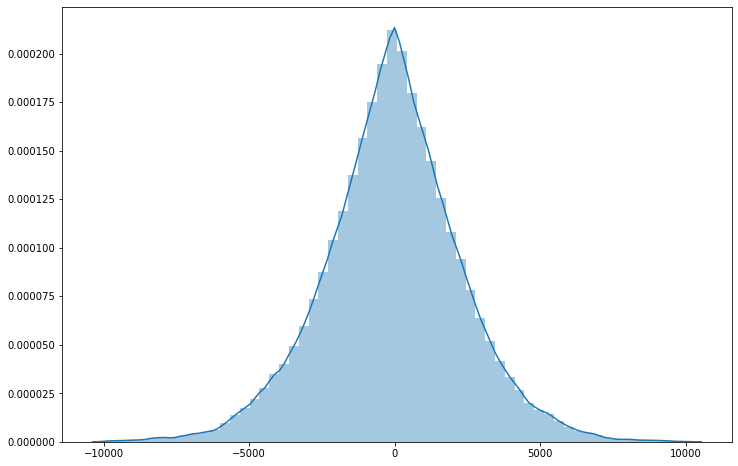

In [22]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
sns.distplot((y_real-predicted), bins=60)

In [23]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,322.2472
1,356.8688,703.0848
2,377.5086,503.3448
3,5778.4782,5000.8238
4,2356.9320,796.2968
...,...,...
1700,3004.0896,373.5138
1701,890.8404,1821.6288
1702,629.1810,1006.6896
1703,253.0040,199.7400


In [24]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.602534
Predicted,0.602534,1.000000
